
<h1>Trabalho Prático - Redes Neurais</H1>

Nome: Rafael Zardo Crevelari \\
Matrícula: 105468

O Código a seguir realiza o download de um conjunto de dados de imagens que podem ser enquadradas em 10 classes distintas. Foi implementada uma rede convolucional, mas no entanto ela possui uma precisão por volta de **50%**. Seu trabalho é aumentar a precisão da rede para que ela fique em torno de **90%.**


# Comentarios Gerais
Após uma série de testes minuciosos, utilizando diferentes modelos e parâmetros, obtive um resultado de 87% de acurácia ao longo de 80 épocas de treinamento, sem apresentar problemas de overfitting. Além disso, mantém um tempo de execução de 30 minutos.


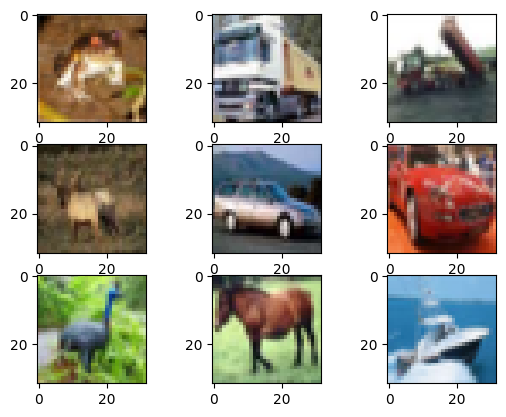

In [3]:
# Plot ad hoc CIFAR10 instances
import numpy as np

from keras.datasets import cifar10
from matplotlib import pyplot
from PIL import Image
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images

for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i])
# show the plot
pyplot.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 32, 32)        1792      
                                                                 
 batch_normalization (BatchN  (None, 64, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 32, 32)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 16, 16)       0         
 )                                                               
                                                        

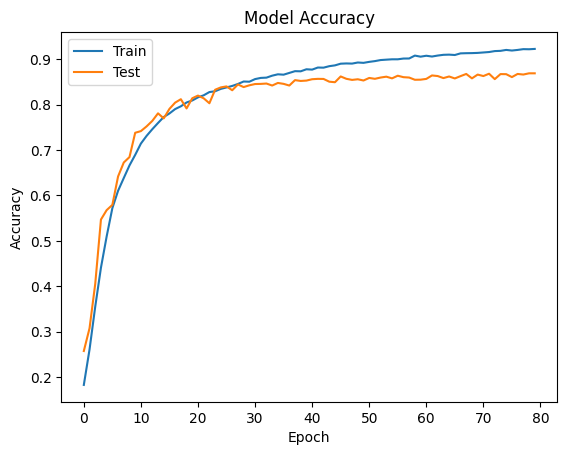

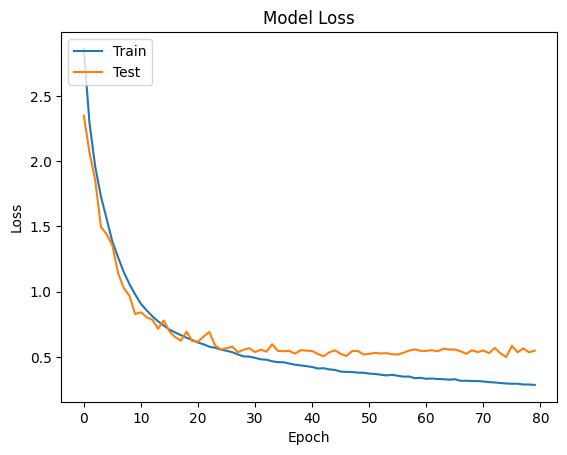


Fim


In [4]:
from time import time
import matplotlib.pyplot as plt
import numpy
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

from keras import backend as K
K.set_image_data_format('channels_first')

# Fixando a aleatoriedade
seed = 7
numpy.random.seed(seed)

# Carregando os dados
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#print("Xtrain[0] ",X_train[0])
#print("Ytrain[0] ",y_train[0])

# Normalizando as entradas para 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# Codificando a saida para one hot
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

#print("Xtrain[0] ",X_train[0])
#print("Ytrain[0] ",y_train[0])

# Criando o modelo
model = Sequential()

# Primeira camada convolucional
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(3, 32, 32)))
model.add(BatchNormalization())  # Normalização em lote para normalizar as ativações
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))  # Camada de pooling para reduzir a dimensionalidade
model.add(Dropout(0.4))  # Dropout para regularização e evitar overfitting

# Segunda camada convolucional
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

# Terceira camada convolucional
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

# Quarta camada convolucional
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.55))

# Quinta camada convolucional
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.55))

# Camada de achatamento
model.add(Flatten())

# Camada densa com 1024 neurônios
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.6))

# Camada de saída com o número de classes e ativação softmax
model.add(Dense(num_classes, activation='softmax'))

# Compilando o modelo
epocas = 80
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Treinando o modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epocas, batch_size=32)

# Avaliação final do modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

# Sumariza a precisão
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Sumariza a perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

model.save('modelT1')

print("\nFim")
